<a href="https://colab.research.google.com/github/jungddddd/ML2/blob/main/2)%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EB%AA%A8%EB%8D%B8_%EB%B6%84%EB%A5%98_04_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Decision Tree
#### iris 분류

In [ ]:
# 필요한 모듈 불러오기
# Scikit-learn 의 datasets 모듈 불러오기
# sklearn.model_selection 의 train_test_split 함수 불러오기
# sklearn.metrics 모듈의 confusion_matrix 함수와 accuracy_score 함수 불러오기
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# datasets의 load_iris() 함수사용
# iris 데이터를 불러와 iris 변수에 할당
iris = datasets.load_iris()

In [ ]:
# DESCR(description) 을 이용해 iris 데이터셋과 관련된 정보 확인
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
iris.data

In [ ]:
# iris 데이터의 feature_names 확인
# 시각화에서 활용
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# iris 데이터의 target_names 확인
# 시각화에서 활용
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
# train_test_split() 함수 이용해 데이터 분할
# train, test 데이터 분할 확인
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    test_size = 0.3,
                                                    random_state = 102)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(105, 4) (45, 4) (105,) (45,)


In [ ]:
# tree 모델 생성
# sklearn 모듈의 tree 사용
from sklearn import tree

In [ ]:
# tree.DecisionTreeClassifier()함수로 트리 모델을 생성해 clf 에 할당
# fit 함수 이용해 train 데이터로 학습 시킴
clf = tree.DecisionTreeClassifier()
clf_dt = clf.fit(x_train, y_train)

In [ ]:
# 생성된 모델에 test 데이터를 넣어 예측
# 예측된 값은 y_pred 변수에 할당
y_pred = clf_dt.predict(x_test)

In [ ]:
# 예측된 값 확인
y_pred

array([0, 2, 1, 1, 2, 0, 0, 0, 1, 1, 2, 1, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2,
       1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 0, 2, 1, 0, 1,
       2])

In [ ]:
# 실제값인 y_test 와 예측값인 y_pred 를 비교
# confusion_matrix() 함수를 이용
cfmat = confusion_matrix(y_test, y_pred)
print(cfmat)

[[17  0  0]
 [ 0 11  1]
 [ 0  2 14]]


In [ ]:
# 실제값인 y_test 와 예측값인 y_pred 를 비교
# accuracy_score() 함수 이용
acc = accuracy_score(y_test, y_pred)
print(acc)

0.9333333333333333


In [ ]:
#pip install graphviz

In [ ]:
# DT 시각화를 위한 graphviz 불러오기
import graphviz

In [ ]:
# tree모듈의 export_graphviz() 함수 사용
# clf_df 모델을 이용해 도식화 하여 dot_data 변수에 할당
# graphviz모듈의 Source() 함수를 이용해 graph 생성
dot_data = tree.export_graphviz(clf_dt, out_file=None,
                                feature_names=iris.feature_names,
                                class_names=iris.target_names,
                                filled=True, rounded=True)

graph = graphviz.Source(dot_data)

In [ ]:
# 그래프 확인
graph

In [ ]:
# tree.export_graphviz() 함수의 out_file 파라미터에 iris_DT.dot로 파일명을 지정해 규칙 저장
dot_data = tree.export_graphviz(clf, out_file= "iris_DT.dot",
                                feature_names=iris.feature_names,
                                class_names=iris.target_names,
                                filled=True, rounded=True)

- #### 엔트로피를 활용한 트리

In [ ]:
# tree.DecisionTreeClassifier()함수로 트리 모델을 생성해 clf2 에 할당
# criterion 파라미터를 entropy로 지정해 분류기준 변경
clf2 = tree.DecisionTreeClassifier(criterion="entropy")

In [ ]:
# fit 함수 이용해 train 데이터로 학습 시킴
# 생성된 모델에 test 데이터를 넣어 예측
# 예측된 값은 y_pred2 변수에 할당
# 실제값인 y_test 와 예측값인 y_pred 를 비교gkdu confusion_matrix와 accuracy_score 확인
clf2_dt = clf2.fit(x_train, y_train)

y_pred2 = clf2_dt.predict(x_test)

print(confusion_matrix(y_test, y_pred2))
print(accuracy_score(y_test, y_pred2))

[[17  0  0]
 [ 0 11  1]
 [ 0  2 14]]
0.9333333333333333


In [ ]:
# tree모듈의 export_graphviz() 함수 사용
# clf2_df 모델을 이용해 도식화 하여 dot_data2 변수에 할당
# graphviz모듈의 Source() 함수를 이용해 graph2 생성
dot_data2 = tree.export_graphviz(clf2_dt,out_file=None,
                               feature_names=iris.feature_names,
                               class_names=iris.target_names,
                               filled=True, rounded=True,
                               special_characters=True)

graph2 = graphviz.Source(dot_data2)

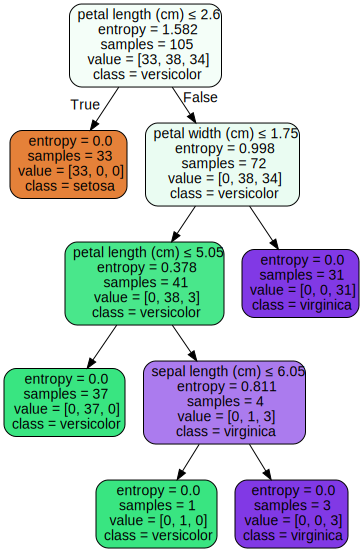

In [ ]:
# 그래프 확인
graph2

- #### 프루닝

In [ ]:
# tree.DecisionTreeClassifier()함수로 트리 모델을 생성해 clf3 에 할당
# criterion 파라미터를 entropy로 지정해 분류기준 변경
# max_depth를 2로 지정하여 깊이 조절하여 가지치기
clf3 = tree.DecisionTreeClassifier(criterion="entropy", max_depth=2)

In [ ]:
# fit 함수 이용해 train 데이터로 학습 시킴
# 생성된 모델에 test 데이터를 넣어 예측
# 예측된 값은 y_pred3 변수에 할당
# 실제값인 y_test 와 예측값인 y_pred 를 비교하여 confusion_matrix와 accuracy_score 확인
clf3_dt = clf3.fit(x_train, y_train)

y_pred3 = clf3_dt.predict(x_test)

print(confusion_matrix(y_test, y_pred3))
print(accuracy_score(y_test, y_pred3))

[[17  0  0]
 [ 0 11  1]
 [ 0  2 14]]
0.9333333333333333


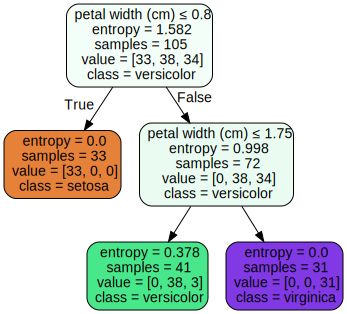

In [ ]:
# tree모듈의 export_graphviz() 함수 사용
# clf3_df 모델을 이용해 도식화 하여 dot_data3 변수에 할당
# graphviz모듈의 Source() 함수를 이용해 graph3 생성 후 그래프 확인
dot_data3 = tree.export_graphviz(clf3_dt,out_file=None,
                                 feature_names=iris.feature_names,
                                 class_names=iris.target_names,
                                 filled=True, rounded=True,
                                 special_characters=True)

graph3 = graphviz.Source(dot_data3)
graph3

In [ ]:
# 실제값인 y_test 와 3개 모델로 예측된 y_pred, y_pred2, y_pred3 을 비교하여 accuracy_score 확인
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred2))
print(accuracy_score(y_test, y_pred3))

0.9333333333333333
0.9333333333333333
0.9333333333333333


In [ ]:
# 더 많은 데이터 이용해 결과 비교
# 실제값인 iris.target 데이터와 clf_dt 모델로 iris.data 데이터를 이용해 예측된 값을 비교하여 accuracy_score 확인
accuracy_score(iris.target,clf_dt.predict(iris.data))

0.98

In [ ]:
# 더 많은 데이터 이용해 결과 비교
# 실제값인 iris.target 데이터와 clf2_dt 모델로 iris.data 데이터를 이용해 예측된 값을 비교하여 accuracy_score 확인
accuracy_score(iris.target,clf2_dt.predict(iris.data)) #엔트로피

0.98

In [ ]:
# 더 많은 데이터 이용해 결과 비교
# 실제값인 iris.target 데이터와 clf3_dt 모델로 iris.data 데이터를 이용해 예측된 값을 비교하여 accuracy_score 확인
accuracy_score(iris.target,clf3_dt.predict(iris.data)) #프루닝

0.96

### <과제> DT를 이용

#### 와인 등급을 분류하는 모델을 만들고, 모델 성능을 평가하시오.

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree

import graphviz

In [ ]:
wine = datasets.load_wine()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target,
                                                    test_size = 0.3,
                                                    random_state = 103)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

In [ ]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf_dt = clf.fit(x_train, y_train)

In [ ]:
y_pred = clf.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

In [ ]:
dot_data = tree.export_graphviz(clf_dt, out_file=None,
                                feature_names=wine.feature_names,
                                class_names=wine.target_names,
                                filled=True, rounded=True,
                                special_characters=True)

graph = graphviz.Source(dot_data)
graph

In [ ]:
clf2 = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

In [ ]:
clf2_dt = clf2.fit(x_train, y_train)

y_pred2 = clf2.predict(x_test)

print(confusion_matrix(y_test, y_pred2))
print(accuracy_score(y_test, y_pred2))